<a href="https://colab.research.google.com/github/Jiya-786/ML_notes/blob/main/O'REILLY's%20Hands-on%20Machine%20Learning/Regression_(hands_on_ML_ch4)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# in many situations you don’t really
# need to know the implementation details.
# However, having a good understanding of how things work can help you quickly
# home in on the appropriate model, the right training algorithm to use, and a good set
# of hyperparameters for your task. Understanding what’s under the hood will also help
# you debug issues and perform error analysis more efficiently. Lastly, most of the top‐
# ics discussed in this chapter will be essential in understanding, building, and training
# neural networks

In [ ]:
# In this chapter, we will start by looking at the Linear Regression model, one of the
# simplest models there is. We will discuss two very different ways to train it:

# • Using a direct “closed-form” equation that directly computes the model parame‐
# ters that best fit the model to the training set (i.e., the model parameters that
# minimize the cost function over the training set)

# • Using an iterative optimization approach, called Gradient Descent (GD), that
# gradually tweaks the model parameters to minimize the cost function over the
# training set, eventually converging to the same set of parameters as the first
# method. We will look at a few variants of Gradient Descent that we will use again
# and again when we study neural networks in Part II: Batch GD, Mini-batch GD,
# and Stochastic GD.

In [ ]:
# Next we will look at Polynomial Regression, a more complex model that can fit non‐
# linear datasets. Since this model has more parameters than Linear Regression, it is
# more prone to overfitting the training data, so we will look at how to detect whether
# or not this is the case, using learning curves, and then we will look at several regulari‐
# zation techniques that can reduce the risk of overfitting the training set.

# Linear Regression-

In [ ]:
# In Chapter 1, we looked at a simple regression model of life satisfaction: life_satisfac‐tion = θ0 + θ1 × GDP_per_capita.
# This model is just a linear function of the input feature GDP_per_capita. θ0 and θ1 are the model’s parameters.
# More generally, a linear model makes a prediction by simply computing a weighted
# sum of the input features, plus a constant called the bias term (also called the intercept
# term), as shown in Equation 4-1.
# Equation 4-1: Linear Regression model prediction
# y = θ0 + θ1 x1 + θ2 x2 + ⋯ + θn xn

In [ ]:
# This can be written much more concisely using a vectorized form, as shown in Equation 4-2.

# Equation 4-2:  Linear Regression model prediction (vectorized form)
# y = hθ(x) = θ · x

In [ ]:
# # Okay, that’s the Linear Regression model, so now how do we train it? Well, recall that
# # training a model means setting its parameters so that the model best fits the training
# # set. For this purpose, we first need a measure of how well (or poorly) the model fits
# # the training data. In Chapter 2 we saw that the most common performance measure
# # of a regression model is the Root Mean Square Error (RMSE) (Equation 2-1). There‐
# # fore, to train a Linear Regression model, you need to find the value of θ that minimi‐
# # zes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a
# function also minimizes its square root).1
# The MSE of a Linear Regression hypothesis hθ
#  on a training set X is calculated using

# Equation 4-3. MSE cost function for a Linear Regression model
# MSE X, hθ= 1/m (∑i from 1 to m (θ^T.xi − yi)^2)


# Linear Regression using the Normal Equation-
## defining our own line and finding out how well the model predicts that line coefficients by solving the normal equation-


In [ ]:
# To find the value of θ that minimizes the cost function, there is a closed-form solution
# —in other words, a mathematical equation that gives the result directly. This is called
# Equation 4-4: The Normal Equation

# θ = (X^T.X)^−1.X^Ty

In [ ]:
# Let's generate some linear-looking data to test this equation on-

In [ ]:
import numpy as np

X=2*np.random.rand(100,1)
# np.random.rand(100,1) creates random numbers from a uniform distribution
# Range: 0 ≤ value < 1
# 100 → number of rows
# 1 → number of columns
# So the shape is: (100, 1)

y=4+3*X+np.random.randn(100,1)
# randn gives values from a normal (Gaussian) distribution Mean = 0
# Some positive, some negative
# This simulates:
# measurement error
# missing factors
# real-world randomness

# Without noise:
# y = 4 + 3 * X
# All points would lie exactly on a straight line → too perfect, unrealistic.

In [ ]:
# Why noise is added to y and not X
# In real problems:
# X = features we observe (size of house, income, etc.)
# y = outcome influenced by many unknown factors

# So noise represents:
# things we didn’t measure
# randomness in the output

# That’s why:
# y = (true relationship) + noise

In [ ]:
# Now let’s compute θusing the Normal Equation. We will use the inv() function from
# NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and
# the dot() method for matrix multiplication:

In [ ]:
X_b=np.c_[np.ones((100,1)),X]
# np.c stacks arrays as columns
# here, we are adding x0=1 to each instance

theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.
# Let’s see what the equation found:

theta_best

array([[4.10731118],
       [2.94203027]])

In [ ]:
# We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close
# enough, but the noise made it impossible to recover the exact parameters of the origi‐
# nal function

# Now you can make predictions using θcap:

In [ ]:
X_new=np.array([[0],[2]])
# X_new.shape is (2,1) -> implies 2 inputs, 1 feature each
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict
# we should get y=4 for x=0 and y=10 for x=2

array([[4.10731118],
       [9.99137172]])

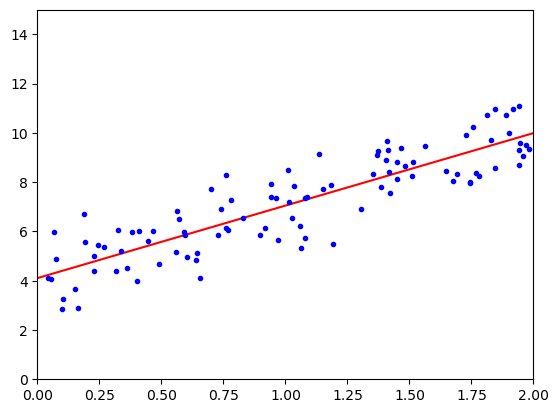

In [ ]:
# the predictions are considerably close
# let's plot this models predictions
plt.plot(X_new,y_predict,"r-")
# "r-" meaning
# "r" → red color
# "-" → solid line
# So this plots a red line connecting the points in X_new, y_predict.

# Important question: only 2 points?
# Yes, X_new has only 2 points ([[0],[2]])
# But plot draws a line connecting the points
# With only 2 points, it will just draw a straight line from the first to the second point
# That’s enough to represent a linear regression line because a line is completely defined by 2 points
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
# [xmin, xmax, ymin, ymax]

# Ensures the plot shows exactly:
# x from 0 to 2
# y from 0 to 15
# Otherwise matplotlib might auto-scale and cut off points.
plt.show()

## Linear Regression using SciKit-Learn-

In [ ]:
# Performing linear regression using Scikit-Learn is quite simple
# Note that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.10731118]), array([[2.94203027]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.10731118],
       [9.99137172]])

In [ ]:
# The LinearRegression class is based on the scipy.linalg.lstsq() function (the
# name stands for “least squares”), which you could call directly:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[4.10731118],
       [2.94203027]])

In [ ]:
np.linalg.pinv(X_b).dot(y)
# This function computes θcap = X+y, where X+ is the pseudoinverse of X (specifically the
# Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoin‐verse directly:


#  Recap: the three methods

## Normal equation:
### theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
### Assumes X_b^T X_b is invertible
### Computes the exact solution of X_b^T X_b θ = X_b^T y

## Pseudo-inverse:
### theta_best_pinv = np.linalg.pinv(X_b) @ y
### Computes Moore-Penrose pseudoinverse
### Uses SVD internally
### Handles rank-deficient or nearly singular matrices safely

## Least squares via SVD:
### theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
### Also uses SVD internally
### Finds the least-squares solution
### Returns residuals, rank, singular values

# Why you see the same solution in your case
### Your dataset:
### X_b.shape = (100,2)  # 100 samples, 1 feature + bias
### Number of samples > number of features → overdetermined system
### X_b is full rank → X_b^T X_b is invertible

## ✅ In this situation:
### Normal equation works perfectly → exact least-squares solution
### Pseudoinverse also works → same least-squares solution
### lstsq also works → same least-squares solution

### All three methods solve the same mathematical problem:
### min ∥𝑋𝑏𝜃−𝑦∥^2

### When X_b is full rank, there’s a unique solution
### That’s why all three produce numerically identical results

## 3️⃣ When differences occur
### Scenario	Normal Eq	Pseudoinverse	lstsq
### Full rank	Same solution	Same	Same
### Nearly singular X_b^T X_b	Can give huge/unstable values	Stable via SVD	Stable via SVD
### Rank-deficient X_b	Fails (cannot invert)	Gives least-norm solution	Gives least-norm solution

### “Least-norm solution” = among all possible solutions, it chooses the one with smallest θ vector length.

## 4️⃣ Intuition 🔑

### Normal equation = algebraic “direct solve”
### Pseudo-inverse = SVD-based “robust solve”
### lstsq = SVD-based “robust solve + extra info”

### When the system is simple and full rank, all three methods collapse to the same θ.

In [ ]:
# The pseudoinverse itself is computed using a standard matrix factorization technique
# called Singular Value Decomposition (SVD) that can decompose the training set
# matrix X into the matrix multiplication of three matrices U Σ VT
# (see numpy.linalg.svd()).
# The pseudoinverse is computed as X+= V.Σ+.U^T
#  To compute the matrix Σ+, the algorithm takes Σ and sets to zero all values smaller than a tiny
# threshold value, then it replaces all the non-zero values with their inverse, and finally
# it transposes the resulting matrix. This approach is more efficient than computing the
# Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
# not work if the matrix XTX is not invertible (i.e., singular), such as if m < n or if some
# features are redundant, but the pseudoinverse is always defined.

# Computational Complexity for the 3 methods of LinearRegression-

In [ ]:
# The Normal Equation computes the inverse of XT X, which is an (n + 1) × (n + 1)
# matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n2.4) to O(n 3 ) (depending on the implementation).
# In other words, if you double the number of features, you multiply the computation
# time by roughly 2^2.4 = 5.3 to 2^3 8.
# The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n^2). If
# you double the number of features, you multiply the computation time by roughly 4.


In [ ]:
# Both the Normal Equation and the SVD approach get very slow
# when the number of features grows large (e.g., 100,000). On the
# positive side, both are linear with regards to the number of instan‐
# ces in the training set (they are O(m)), so they handle large training
# sets efficiently, provided they can fit in memory

In [ ]:
# Also, once you have trained your Linear Regression model (using the Normal Equa‐
# tion or any other algorithm), predictions are very fast: the computational complexity
# is linear with regards to both the number of instances you want to make predictions
# on and the number of features. In other words, making predictions on twice as many
# instances (or twice as many features) will just take roughly twice as much time.

## There is also another way to train a Linear Regression model- using gradient descent, but for now, moving on to polynomial regression
##  While the Normal Equation can only perform Linear Regression, the Gradient Descent algorithms can be used to train many other models, as we will see.


# Polynomial Regression-

In [ ]:
# What if your data is actually more complex than a simple straight line? Surprisingly,
# you can actually use a linear model to fit nonlinear data. A simple way to do this is to
# add powers of each feature as new features, then train a linear model on this extended
# set of features. This technique is called Polynomial Regression.

In [ ]:
#  First, let’s generate some nonlinear data, based on a simple
# quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

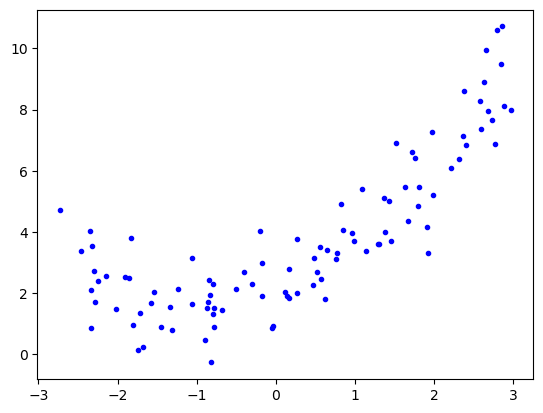

In [ ]:
plt.plot(X,y,"b.")

In [ ]:
# Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
# nomialFeatures class to transform our training data, adding the square (2nd-degree
# polynomial) of each feature in the training set as new features (in this case there is
# just one feature)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=False)
# Parameters explained
# degree=2
# Generates features up to x²
# If you have a single feature x, it will create:
# [x] → [x, x^2]

# If you had two features [x1, x2] and degree=2, it creates:
# [x1, x2] → [x1, x2, x1^2, x1*x2, x2^2]
# All combinations up to degree 2

# include_bias=False
# By default, PolynomialFeatures adds a bias column of 1s
# include_bias=False → don’t add the extra column of 1s
# This is because most ML models (like LinearRegression in sklearn) already handle the intercept

X_poly=poly_features.fit_transform(X)
# Example-
# X = np.array([[2], [3], [4]])
# poly = PolynomialFeatures(degree=2, include_bias=False)
# Step-by-step-
# poly.fit(X)                   # learns internal info (none for polynomial)
# X_poly = poly.transform(X)    # creates [[2,4], [3,9], [4,16]]

# Shortcut-
# X_poly = poly.fit_transform(X)


In [ ]:
X[0]

array([0.8261478])

In [ ]:
X_poly[0]

array([0.8261478 , 0.68252019])

In [ ]:
# X_poly now contains the original feature of X plus the square of this feature. Now you
# can fit a LinearRegression model to this extended training data

In [ ]:
X_poly

array([[ 8.26147804e-01,  6.82520194e-01],
       [-5.22343876e-02,  2.72843125e-03],
       [-4.98924012e-01,  2.48925169e-01],
       [ 2.36434883e+00,  5.59014541e+00],
       [ 8.43415278e-01,  7.11349331e-01],
       [-1.53865382e+00,  2.36745558e+00],
       [ 5.52201610e-01,  3.04926618e-01],
       [ 2.67525902e+00,  7.15701084e+00],
       [-7.99916487e-01,  6.39866385e-01],
       [ 2.86132009e+00,  8.18715265e+00],
       [-7.78950187e-01,  6.06763394e-01],
       [-1.70269007e-01,  2.89915347e-02],
       [-3.92107812e-02,  1.53748536e-03],
       [-7.93043920e-01,  6.28918659e-01],
       [-1.85471298e+00,  3.43996024e+00],
       [-2.28689805e+00,  5.22990269e+00],
       [-1.75817332e-01,  3.09117344e-02],
       [ 1.38871552e-01,  1.92853080e-02],
       [-8.74724781e-01,  7.65143442e-01],
       [ 1.09392174e+00,  1.19666477e+00],
       [ 2.21249571e+00,  4.89513727e+00],
       [ 2.97075644e+00,  8.82539384e+00],
       [-7.80302637e-01,  6.08872206e-01],
       [ 1.

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.14460982]), array([[0.98658014, 0.4943231 ]]))

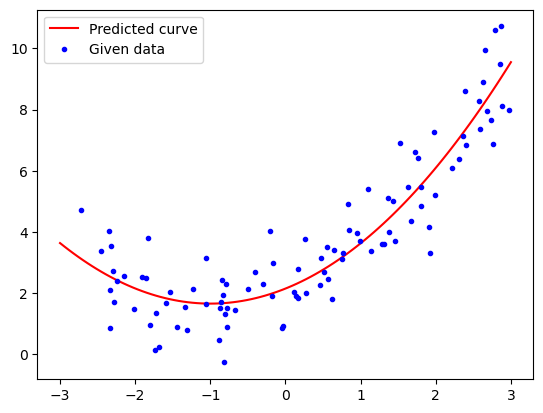

In [ ]:
# until yet we have only fit the data on the curve, we did not make any predictions,
# now we will generate some 'x' values, here, 100 'x' values and each will have only 1 value since we have only 1 variable x

X_data=np.linspace(-3,3,100).reshape(-1,1)
# here -3 and 3 becuse they are end-points of our x range.
# reshape (-1,1) beciase -1 means choose the no.of rows value on your own
# and 1 becuase there is only 1 column x becuase we have only 1 feature x
X_data_poly=poly_features.fit_transform(X_data)
y_predicted=lin_reg.predict(X_data_poly)
plt.plot(X_data,y_predicted,"r-",label="Predicted curve")
plt.plot(X,y,"b.",label="Given data")
plt.legend()
plt.show()

In [ ]:
# Note that when there are multiple features, Polynomial Regression is capable of find‐
# ing relationships between features (which is something a plain Linear Regression
# model cannot do). This is made possible by the fact that PolynomialFeatures also
# adds all combinations of features up to the given degree. For example, if there were
# two features a and b, PolynomialFeatures with degree=3 would not only add the
# features a2 ,a3, b2, and b3, but also the combinations ab, a2b, and ab2

# Learning curves-

In [ ]:
# If you perform high-degree Polynomial Regression, you will likely fit the training
# data much better than with plain Linear Regression. For example, Figure 4-14 applies
# a 300-degree polynomial model to the preceding training data, and compares the
# result with a pure linear model and a quadratic model (2nd-degree polynomial).
# Notice how the 300-degree polynomial model wiggles around to get as close as possi‐
# ble to the training instances.

# Of course, this high-degree Polynomial Regression model is severely overfitting the
# training data, while the linear model is underfitting it. The model that will generalize
# best in this case is the quadratic model. It makes sense since the data was generated
# using a quadratic model, but in general you won’t know what function generated the
# data, so how can you decide how complex your model should be? How can you tell
# that your model is overfitting or underfitting the data?

# In Chapter 2 you used cross-validation to get an estimate of a model’s generalization
# performance. If a model performs well on the training data but generalizes poorly
# according to the cross-validation metrics, then your model is overfitting. If it per‐
# forms poorly on both, then it is underfitting. This is one way to tell when a model is
# too simple or too complex.

In [ ]:
# Another way is to look at the learning curves: these are plots of the model’s perfor‐
# mance on the training set and the validation set as a function of the training set size
# (or the training iteration). To generate the plots, simply train the model several times
# on different sized subsets of the training set. The following code defines a function
# that plots the learning curves of a model given some training data:

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

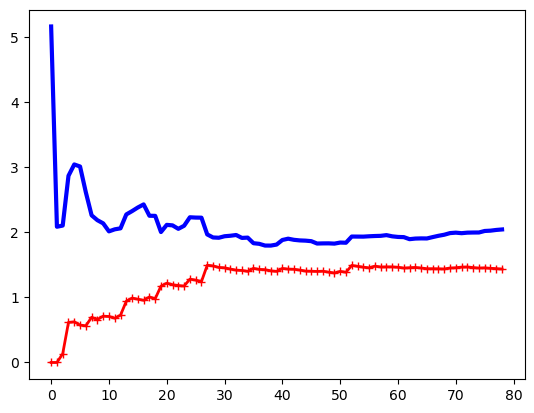

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# here red-> traning data
# blue-> validation data

In [ ]:
# This deserves a bit of explanation. First, let’s look at the performance on the training
# data: when there are just one or two instances in the training set, the model can fit
# them perfectly, which is why the curve starts at zero. But as new instances are added
# to the training set, it becomes impossible for the model to fit the training data per‐
# fectly, both because the data is noisy and because it is not linear at all. So the error on
# the training data goes up until it reaches a plateau, at which point adding new instan‐
# ces to the training set doesn’t make the average error much better or worse. Now let’s
# look at the performance of the model on the validation data. When the model is
# trained on very few training instances, it is incapable of generalizing properly, which
# is why the validation error is initially quite big. Then as the model is shown more
# training examples, it learns and thus the validation error slowly goes down. However,
# once again a straight line cannot do a good job modeling the data, so the error ends
# up at a plateau, very close to the other curve.
# These learning curves are typical of an underfitting model. Both curves have reached
# a plateau; they are close and fairly high.

# If your model is underfitting the training data, adding more train‐
# ing examples will not help. You need to use a more complex model
# or come up with better features.

In [ ]:
# Now let’s look at the learning curves of a 10th-degree polynomial model on the same
# data:

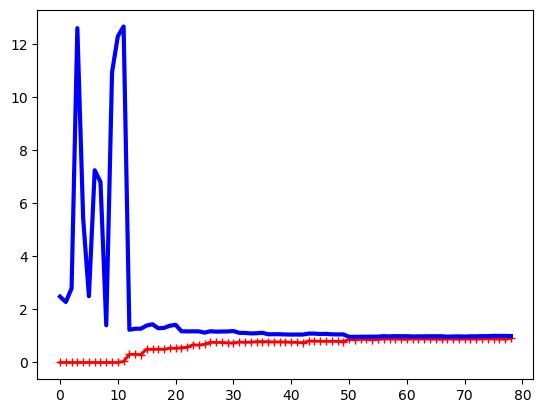

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(polynomial_regression, X, y)

In [ ]:
# These learning curves look a bit like the previous ones, but there are two very impor‐
# tant differences:
# • The error on the training data is much lower than with the Linear Regression
# model.
# • There is a gap between the curves. This means that the model performs signifi‐
# cantly better on the training data than on the validation data, which is the hall‐
# mark of an overfitting model. However, if you used a much larger training set,
# the two curves would continue to get closer.

In [ ]:
# One way to improve an overfitting model is to feed it more training
# data until the validation error reaches the training error.

# <span style="color:red"> Bias vs Variance tradeoff-</span>
## An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:
#  Bias
## This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.10
# Variance
## This part is due to the model’s excessive sensitivity to small variations in thetraining data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.
# Irreducible error
## This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).
# Increasing a model’s complexity will typically increase its variance and reduce its bias.
# Conversely, reducing a model’s complexity increases its bias and reduces its variance.
# This is why it is called a tradeoff.

# <span style="color:red"> Ridge Regression-</span>


In [ ]:
# Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to
#  α.(∑i = 1 to n (θi)^2) is added to the cost function.
# This forces the learning algorithm to not only fit the data but also keep the modelweights as small as possible.
# Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate
# the model’s performance using the unregularized performance measure

# The hyperparameter α controls how much you want to regularize the model. If α = 0
# then Ridge Regression is just Linear Regression. If α is very large, then all weights end
# up very close to zero and the result is a flat line going through the data’s mean. Equa‐
# tion 4-8 presents the Ridge Regression cost function.

# Equation 4-8. Ridge Regression cost function
# J(θ) = MSE(θ) + α/2.(∑i = 1 to n).θi^2

# Note that the bias term θ0 is not regularized (the sum starts at i = 1, not 0). If we define w
# as the vector of feature weights (θ1 to θn), then the regularization term is simply equal to ½(∥w∥)2,
# where ∥ w ∥ represents the ℓ2 norm of the weight vector.

